<a href="https://colab.research.google.com/github/saikiranmodem/House-price-prediction/blob/main/Deep_Learning_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as trf
from tensorflow import keras

In [2]:
print(trf.__version__)

2.15.0


In [3]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
mnist = keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
type(mnist)

module

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [10]:
len(X_train[0])

28

In [11]:
len(X_train[1][0]),len(X_train[1])

(28, 28)

In [12]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [13]:
len(X_train[4])

28

In [14]:
X_train[4].shape
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 175,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 191,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 221,
        253, 252, 124,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 125,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 253, 253, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 253, 253, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 252,  42,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        149, 252, 252, 252, 144,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        109, 252, 252, 252, 144,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 253, 253, 255,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 175, 252, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  73, 252, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  31, 211, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [15]:
type(X_train)

numpy.ndarray

In [16]:
np.max(X_train)

255

In [17]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [18]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [19]:
y_train[0]

5

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
y_train[1]

0

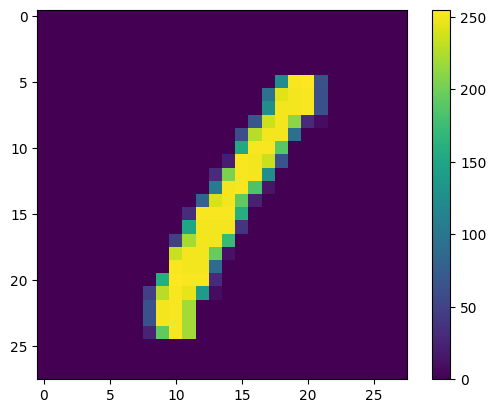

In [23]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.show()

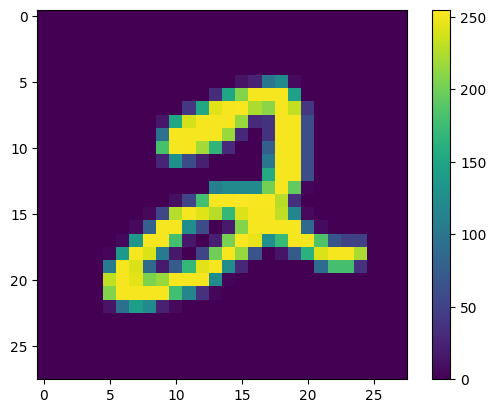

In [24]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.show()

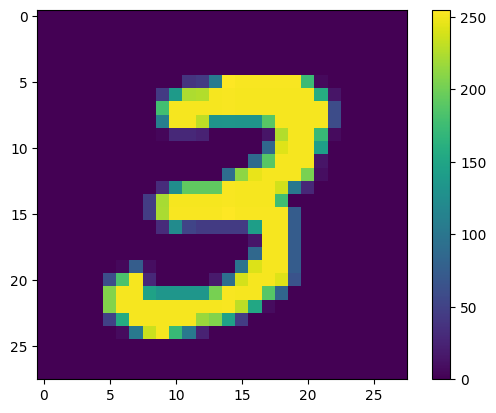

In [25]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()
plt.show()

In [26]:
y_train[8]
class_names[y_train[8]]

'1'

In [27]:
y_train[9]
class_names[y_train[9]]

'4'

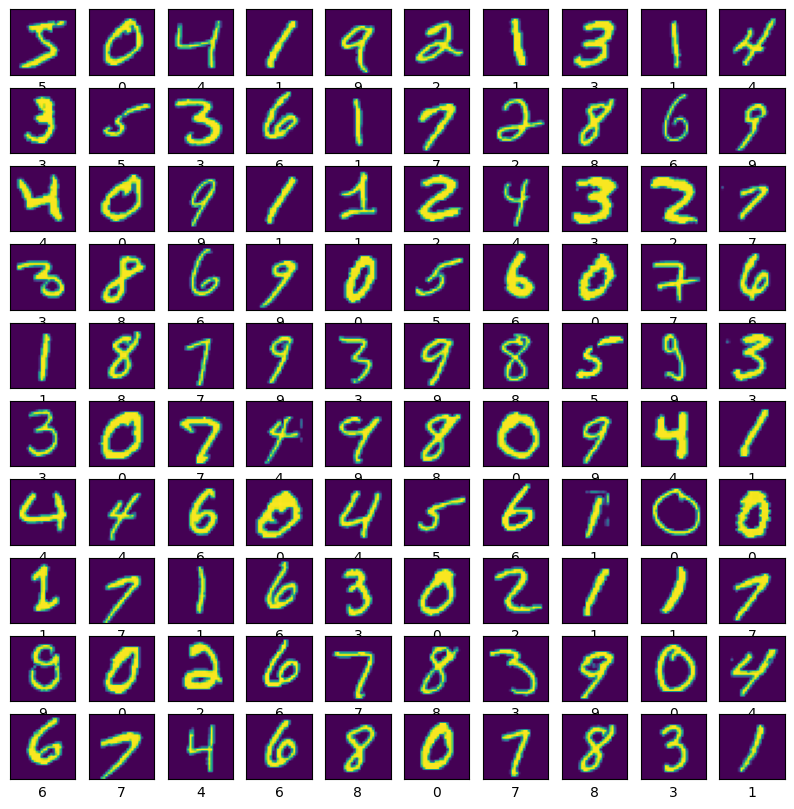

In [28]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

**Normalization**

In [29]:
X_train = X_train/255.0
X_test = X_test/255.0

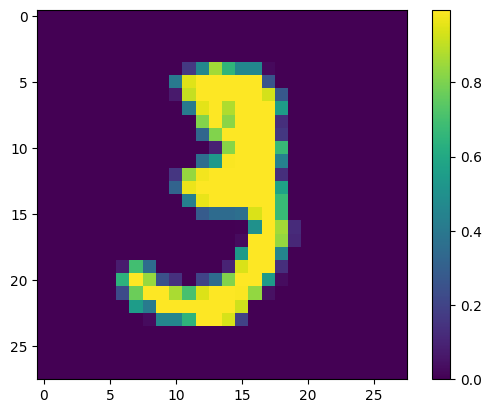

In [30]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.show()

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [32]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(28,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 22270 (86.99 KB)
Trainable params: 22270 (86.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Compilation**

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.8977
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2017 - accuracy: 0.9424
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1601 - accuracy: 0.9535
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9607
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9654
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9712
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9735
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0817 - accuracy: 0.9754
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.077

In [36]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=41,verbose=True)

Epoch 1/41
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 2/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9801
Epoch 3/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9807
Epoch 4/41
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9815
Epoch 5/41
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0628 - accuracy: 0.9819
Epoch 6/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9821
Epoch 7/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0604 - accuracy: 0.9827
Epoch 8/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9831
Epoch 9/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9836
Epoch 10/41
1875/1875 [==============================] - 3s 2ms/step - loss: 0.056

In [37]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9646
0.22252289950847626
0.9646000266075134


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[6.3045678e-22, 1.7214982e-20, 1.2910143e-15, ..., 9.9999994e-01,
        4.3245694e-13, 5.0691474e-15],
       [1.6464070e-09, 3.3180497e-11, 9.9999994e-01, ..., 0.0000000e+00,
        1.2829347e-13, 2.0789354e-25],
       [6.3107402e-13, 9.9999732e-01, 8.5717613e-07, ..., 1.0271469e-06,
        6.3181307e-07, 9.6460041e-11],
       ...,
       [1.4393666e-24, 2.6073757e-20, 3.3294153e-22, ..., 4.8745949e-08,
        1.3041086e-11, 5.1070145e-07],
       [2.6608975e-20, 5.9134983e-17, 3.1463744e-20, ..., 1.9173790e-18,
        3.0732556e-04, 8.3523141e-20],
       [2.2797801e-27, 0.0000000e+00, 9.6613083e-19, ..., 0.0000000e+00,
        1.6747652e-33, 0.0000000e+00]], dtype=float32)

In [40]:
len(y_pred)

10000

In [41]:
y_pred[0]

array([6.3045678e-22, 1.7214982e-20, 1.2910143e-15, 8.1171745e-12,
       1.4477949e-21, 2.4010083e-15, 7.6389896e-35, 9.9999994e-01,
       4.3245694e-13, 5.0691474e-15], dtype=float32)

In [42]:
np.sum(y_pred[0])

0.99999994

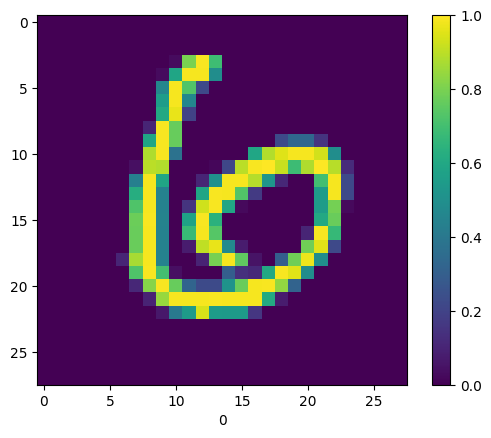

In [43]:
plt.figure()
plt.imshow(X_test[11])
plt.xlabel(class_names[0])
plt.colorbar()
plt.show()

In [44]:
max=np.max(y_pred[1])
max

0.99999994

In [45]:
list(y_pred[1]).index(max)

2

In [46]:
y_pred[4]
max=np.max(y_pred[4])
index=list(y_pred[4]).index(max)
class_names[index]

'4'

In [47]:
class_names[np.argmax(y_pred[5])]

'1'

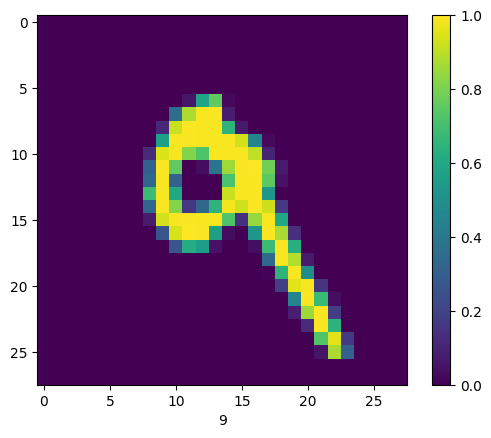

In [48]:
plt.figure()
plt.imshow(X_test[7])
plt.xlabel(class_names[np.argmax(y_pred[7])])
plt.colorbar()

In [49]:
import pandas as pd
max_values=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
predictions=[class_names[i] for i in index]
pd.DataFrame(zip(max_values,index,predictions),columns=['Max','Index','Predictions'])

,Max,Index,Predictions
0,1.000000,7,7
1,1.000000,2,2
2,0.999997,1,1
3,1.000000,0,0
4,0.999972,4,4
...,...,...,...
9995,1.000000,2,2
9996,1.000000,3,3
9997,0.999999,4,4
9998,0.999693,5,5


In [51]:
import pandas as pd
max_values=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
predictions=[class_names[i] for i in index]
Ground_Truth=[class_names[i] for i in y_test]

d1=pd.DataFrame(zip(max_values,index,predictions,Ground_Truth),columns=['Max','Index','Predictions','Ground_Truth'])

d1['Output']=np.where(d1['Predictions']==d1['Ground_Truth'],1,0)
d1

,Max,Index,Predictions,Ground_Truth,Output
0,1.000000,7,7,7,1
1,1.000000,2,2,2,1
2,0.999997,1,1,1,1
3,1.000000,0,0,0,1
4,0.999972,4,4,4,1
...,...,...,...,...,...
9995,1.000000,2,2,2,1
9996,1.000000,3,3,3,1
9997,0.999999,4,4,4,1
9998,0.999693,5,5,5,1


In [53]:
accuracy=np.sum(d1['Output'])/len(d1['Output'])
accuracy

0.9646

In [54]:
d1

,Max,Index,Predictions,Ground_Truth,Output
0,1.000000,7,7,7,1
1,1.000000,2,2,2,1
2,0.999997,1,1,1,1
3,1.000000,0,0,0,1
4,0.999972,4,4,4,1
...,...,...,...,...,...
9995,1.000000,2,2,2,1
9996,1.000000,3,3,3,1
9997,0.999999,4,4,4,1
9998,0.999693,5,5,5,1
